In [1]:
import json
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f = open('final-results.json', )
data = json.load(f)
f.close()


configs = []
for x in data['configs']:
    configs.append({
        'fitness_function': x['evolution']['fitness_function'],
        'survival_criterion': x['evolution']['survival_selection_criterion'],
        'reproduction_criterion': x['evolution']['reproduction_selection_criterion'],
        'mutation_rate': x['evolution']['mutation_rate'],
        'survival_rate': x['evolution']['survival_rate'],
        'max': x['stats']['time_steps'],
        'mean': np.mean(x['stats']['time_step_history']),
        'median': np.median(x['stats']['time_step_history']),
        'step_history': x['stats']['time_step_history'],
        'best_ca': x['stats']['best_individual'],
        'best_generation': x['stats']['best_generation'],
    })


df = pd.DataFrame(configs)
df = pd.concat([df.drop(['best_ca'], axis=1), df['best_ca'].apply(pd.Series)], axis=1)
df['successful'] = df['max'] > 15000
successful = df[df['successful'] == True]

In [2]:
df[['fitness_function', 'survival_criterion', 'reproduction_criterion', 'mutation_rate', 'survival_rate', 'max', 'best_generation']]

,fitness_function,survival_criterion,reproduction_criterion,mutation_rate,survival_rate,max,best_generation
0,total_time_steps,uniform,uniform,0.01,0.1,1518.0,10
1,angle_and_time_based,rank_proportional,fitness_proportional,0.01,0.2,20197.0,5
2,total_time_steps,rank_proportional,elitist,0.01,0.1,4527.0,35
3,angle_and_time_based,tournament,rank_proportional,0.01,0.2,1044.0,2
4,time_based,tournament,uniform,0.01,0.1,6225.0,27
...,...,...,...,...,...,...,...
295,angle_based,tournament,elitist,0.01,0.2,2242.0,7
296,total_time_steps,elitist,elitist,0.01,0.0,7625.0,18
297,total_time_steps,uniform,fitness_proportional,0.01,0.0,554.0,18
298,position_and_angle_based,rank_proportional,elitist,0.01,0.1,19477.0,38


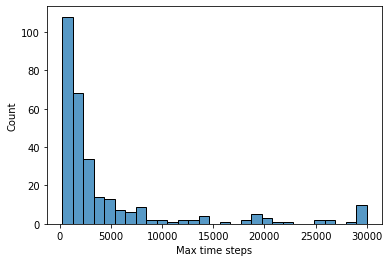

In [3]:
ax = sns.histplot(data=df, x="max")
ax.set_xlabel('Max time steps')
ax.set_ylabel('Count')
plt.savefig('max_dist.png')

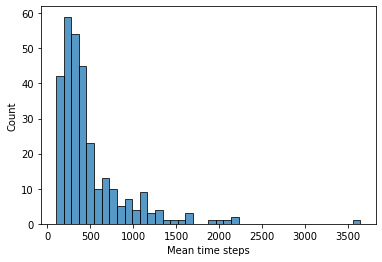

In [4]:
ax = sns.histplot(data=df, x="mean")
ax.set_xlabel('Mean time steps')
ax.set_ylabel('Count')
plt.savefig('mean_dist.png')

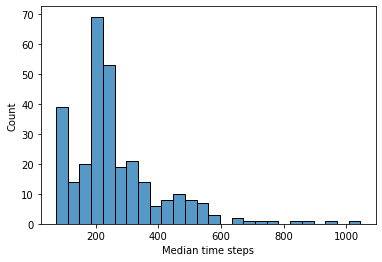

In [5]:
ax = sns.histplot(data=df, x="median")
ax.set_xlabel('Median time steps')
ax.set_ylabel('Count')
plt.savefig('median_dist.png')

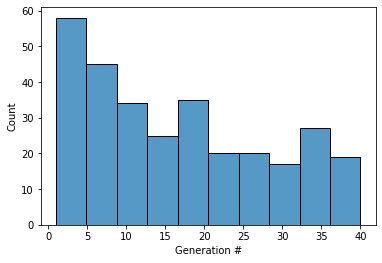

In [6]:
ax = sns.histplot(data=df, x="best_generation")
ax.set_xlabel('Generation #')
ax.set_ylabel('Count')
plt.savefig('gen_dist.png')

In [7]:
df['mean'].mean()

490.39850000000007

In [8]:
df['median'].median()

227.25

In [9]:
len(df), len(df[df['max'] > 1000])

(300, 221)

In [10]:
len(df), len(df[df['max'] > 10000])

(300, 38)

In [11]:
len(df), len(df[df['max'] > 20000])

(300, 20)

In [12]:
len(df), len(df[df['max'] > 25000])

(300, 14)

In [13]:
maxed_out = df[df['max'] == 29999]
len(maxed_out)

10

In [14]:
len(successful)

28

In [15]:
successful['mean'].mean(), successful['median'].median()

(1366.6, 356.0)

In [16]:
df.groupby('fitness_function')['max'].max()

In [17]:
df.groupby('fitness_function')['mean'].mean()

In [18]:
df.groupby('fitness_function')['median'].median()

In [19]:
successful.groupby('fitness_function')['successful'].count().sort_values(ascending=False)

In [20]:
df['fitness_function_short'] = df['fitness_function'].replace(
    {
        'angle_based': 'ab',
        'position_based': 'pb',
        'angle_and_time_based': 'atb',
        'time_based': 'tb',
        'total_time_steps': 'tts',
        'position_and_angle_based': 'pab',
    }
)

df

,fitness_function,survival_criterion,reproduction_criterion,mutation_rate,survival_rate,max,mean,median,step_history,best_generation,...,width,kernel_size,action_index,rule_number,pole_angle,pole_velocity,cart_position,cart_velocity,successful,fitness_function_short
0,total_time_steps,uniform,uniform,0.01,0.1,1518.0,308.200,242.5,"[247.0, 223.0, 239.0, 182.0, 293.0, 237.0, 240...",10,...,5,3,2,172,"[{'value': -0.03, 'index': 2}]","[{'value': -0.02, 'index': 0}]","[{'value': 0.01, 'index': 1}]","[{'value': 0.03, 'index': 0}]",False,tts
1,angle_and_time_based,rank_proportional,fitness_proportional,0.01,0.2,20197.0,738.350,132.5,"[169.0, 455.0, 277.0, 566.0, 20197.0, 391.0, 2...",5,...,5,3,4,140,"[{'value': -0.02, 'index': 4}]","[{'value': 0.05, 'index': 4}]","[{'value': -0.01, 'index': 4}]","[{'value': 0.03, 'index': 1}]",True,atb
2,total_time_steps,rank_proportional,elitist,0.01,0.1,4527.0,808.550,500.0,"[298.0, 1196.0, 247.0, 221.0, 237.0, 304.0, 26...",35,...,5,3,4,207,"[{'value': 0.019999999999999997, 'index': 4}]","[{'value': -0.019999999999999997, 'index': 0}]","[{'value': 0.03, 'index': 2}]","[{'value': -0.060000000000000005, 'index': 3}]",False,tts
3,angle_and_time_based,tournament,rank_proportional,0.01,0.2,1044.0,143.425,82.0,"[230.0, 1044.0, 368.0, 328.0, 329.0, 75.0, 214...",2,...,5,3,1,186,"[{'value': 0.01, 'index': 3}]","[{'value': 0.0, 'index': 2}]","[{'value': 0.01, 'index': 3}]","[{'value': -0.05, 'index': 0}]",False,atb
4,time_based,tournament,uniform,0.01,0.1,6225.0,876.450,504.5,"[158.0, 426.0, 562.0, 520.0, 327.0, 217.0, 488...",27,...,5,3,2,208,"[{'value': -0.009999999999999997, 'index': 4}]","[{'value': -0.060000000000000005, 'index': 3}]","[{'value': 0.04, 'index': 4}]","[{'value': 0.060000000000000005, 'index': 1}]",False,tb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,angle_based,tournament,elitist,0.01,0.2,2242.0,485.025,397.5,"[444.0, 617.0, 459.0, 395.0, 259.0, 328.0, 224...",7,...,5,3,0,185,"[{'value': 0.03, 'index': 1}]","[{'value': 0.0, 'index': 1}]","[{'value': -0.02, 'index': 4}]","[{'value': -0.03, 'index': 3}]",False,ab
296,total_time_steps,elitist,elitist,0.01,0.0,7625.0,445.200,220.5,"[152.0, 306.0, 204.0, 209.0, 224.0, 377.0, 256...",18,...,5,3,3,178,"[{'value': 0.0, 'index': 2}]","[{'value': -0.03, 'index': 4}]","[{'value': 0.02, 'index': 1}]","[{'value': -0.01, 'index': 3}]",False,tts
297,total_time_steps,uniform,fitness_proportional,0.01,0.0,554.0,219.725,203.5,"[245.0, 161.0, 269.0, 135.0, 229.0, 279.0, 294...",18,...,5,3,4,129,"[{'value': 0.02, 'index': 3}]","[{'value': -0.03, 'index': 2}]","[{'value': -0.03, 'index': 4}]","[{'value': 0.01, 'index': 0}]",False,tts
298,position_and_angle_based,rank_proportional,elitist,0.01,0.1,19477.0,1286.350,362.5,"[237.0, 301.0, 317.0, 468.0, 359.0, 335.0, 226...",38,...,5,3,3,244,"[{'value': 0.02, 'index': 2}]","[{'value': 0.01, 'index': 1}]","[{'value': -0.02, 'index': 1}]","[{'value': 0.019999999999999997, 'index': 0}]",True,pab


In [21]:
from lets_plot import *
ggplot(df) + geom_point(aes(x="action_index", y="best_generation")) + ggtitle("Hello!") + xlab("Some Axi label")

In [22]:
data = df.explode('step_history').reset_index(drop=True)
data.step_history = data.step_history.astype(float)

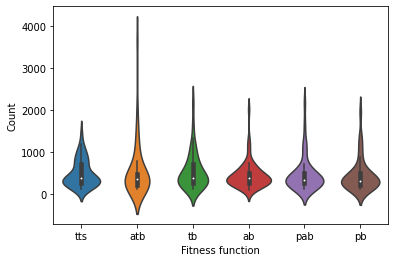

In [23]:

#sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="fitness_function_short", y="mean", data=df)
ax.set_xlabel('Fitness function')
ax.set_ylabel('Count')
plt.savefig('mean_violin.png')

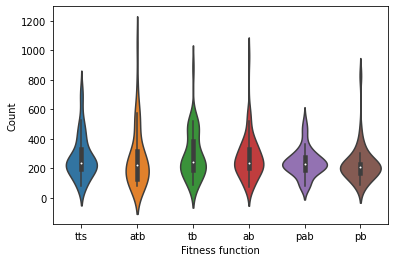

In [24]:

#sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="fitness_function_short", y="median", data=df)
ax.set_xlabel('Fitness function')
ax.set_ylabel('Count')
plt.savefig('median_violin.png')

In [25]:
successful.fitness_function.value_counts()

In [26]:
successful.survival_criterion.value_counts()

In [27]:
successful.reproduction_criterion.value_counts()

In [28]:
top_10 = successful.sort_values(by='max', ascending=False).head(10)

In [29]:
fig = go.Figure()

for x in range(len(top_10)):
    values = top_10[x:x+1].step_history.values.tolist()

    out = []
    for idx, y in enumerate(values[0]):
        out.append({'value': y})

    data = pd.DataFrame(out)

    fig.add_trace(go.Scatter(y=data['value'],
                             mode='lines',
                             name=x +1 ))
    continue
fig.show()

Unsupported

In [30]:
df.groupby(['fitness_function', 'survival_criterion', 'reproduction_criterion'])['mean'].max().reset_index().sort_values(by='mean',ascending=False).head(5)

,fitness_function,survival_criterion,reproduction_criterion,mean
13,angle_and_time_based,rank_proportional,tournament,3646.050
50,position_and_angle_based,rank_proportional,elitist,2175.675
95,time_based,tournament,elitist,2175.600
10,angle_and_time_based,rank_proportional,elitist,2120.700
31,angle_based,rank_proportional,elitist,2012.775


In [31]:
df.groupby(['fitness_function', 'survival_criterion', 'reproduction_criterion'])['median'].max().reset_index().sort_values(by='median',ascending=False).head(5)

,fitness_function,survival_criterion,reproduction_criterion,median
12,angle_and_time_based,rank_proportional,rank_proportional,1045.0
24,angle_based,elitist,tournament,961.5
81,time_based,elitist,elitist,883.5
64,position_based,elitist,tournament,829.5
10,angle_and_time_based,rank_proportional,elitist,771.0


In [32]:
df['pole_angle'] = df['pole_angle'].apply(lambda x: x[0])
df = pd.concat([df.drop(['pole_angle'], axis=1), df['pole_angle'].apply(pd.Series)], axis=1)
df['pole_angle'] = df['value']

In [37]:
successful.rule_number.value_counts().head(5)

In [38]:
successful.survival_rate.value_counts()

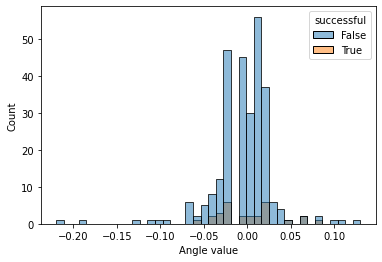

In [39]:
ax = sns.histplot(data=df, x="pole_angle", hue='successful')
ax.set_xlabel('Angle value')
ax.set_ylabel('Count')
plt.savefig('angle_dist.png')